In [1]:
import csv

In [2]:
import pandas as pd
import numpy as np
from collections import Counter

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

In [142]:
#path = '../../bert-cmp/bert/'
path = '../large-corpus/'

In [143]:
results_df = pd.read_csv(path+'cls_output-methodname/test_results.tsv', header=None, sep='\t')
results_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,10646,10647,10648,10649,10650,10651,10652,10653,10654,10655
0,4.185846e-06,1.072607e-05,2.678383e-05,5.868325e-05,5.790507e-05,5.501922e-06,1.831420e-08,1.441312e-05,5.782143e-06,2.314050e-08,...,2.607210e-08,1.714628e-06,7.930739e-07,1.207565e-05,2.242353e-08,1.116518e-05,6.553058e-06,4.554523e-05,3.510054e-05,8.818220e-06
1,5.863501e-08,5.862878e-07,2.793636e-07,6.325499e-08,1.527967e-07,1.050582e-06,5.837550e-10,2.072408e-07,1.121828e-06,7.275072e-10,...,8.214197e-10,1.467926e-06,8.688337e-07,4.756328e-07,8.600707e-10,1.622881e-06,2.258160e-07,3.646840e-08,1.392962e-07,1.779033e-07
2,8.035826e-12,8.520677e-12,1.845136e-11,2.835352e-11,6.616994e-11,2.340380e-11,1.256565e-12,8.290610e-12,1.351190e-11,1.341703e-12,...,1.138942e-12,2.038623e-11,2.836039e-11,3.386069e-11,1.292096e-12,8.172017e-11,3.077739e-11,2.709178e-11,7.781061e-12,4.475734e-12
3,1.629240e-09,1.657102e-09,3.991607e-09,3.730912e-09,1.109841e-08,3.196105e-08,2.281141e-11,4.942599e-09,3.330944e-08,2.364193e-11,...,2.342191e-11,3.134998e-08,1.240997e-07,1.207544e-07,2.330592e-11,6.678697e-08,3.448734e-07,2.266654e-08,5.745768e-08,5.050016e-08
4,1.361640e-10,1.136607e-09,1.075225e-09,3.519405e-10,6.087009e-10,2.253288e-09,5.446154e-12,3.097352e-09,3.180823e-09,4.855120e-12,...,4.808974e-12,7.125919e-09,7.132718e-09,1.443698e-09,4.461857e-12,1.002815e-08,1.321813e-09,6.019674e-10,2.569878e-09,4.361596e-10
5,2.701245e-06,4.310450e-07,1.089020e-05,3.724303e-06,2.525652e-05,1.133505e-05,2.727089e-07,1.112282e-06,3.154634e-05,3.732426e-07,...,3.667135e-07,1.896600e-06,5.428673e-06,1.023166e-06,3.757380e-07,4.105170e-06,1.751427e-06,4.579334e-06,8.206015e-06,3.169529e-06
6,1.695260e-08,1.195565e-07,3.549296e-07,9.854104e-08,1.579093e-07,1.599512e-08,1.479867e-09,7.495963e-08,8.016224e-07,1.795321e-09,...,2.049684e-09,3.846296e-09,7.721437e-09,5.957828e-09,2.226605e-09,4.003595e-07,9.653867e-09,1.345950e-07,1.921127e-07,2.055729e-07
7,2.466879e-05,3.460404e-06,1.159605e-05,1.466012e-05,2.050074e-05,8.891102e-05,6.953192e-07,4.678439e-07,3.123330e-06,7.668597e-07,...,6.962269e-07,5.100338e-06,3.355947e-05,7.287473e-07,7.831615e-07,1.708988e-07,3.960274e-06,1.827873e-06,1.429972e-06,2.114608e-05
8,1.051640e-04,3.420593e-05,2.547091e-05,9.280176e-05,1.873575e-04,3.183725e-04,1.016280e-06,1.573967e-05,5.953427e-05,9.584609e-07,...,1.229316e-06,9.896682e-06,1.189033e-05,3.031065e-06,1.001922e-06,1.676208e-05,9.383207e-06,8.991116e-06,1.964020e-05,1.475222e-04
9,5.281368e-06,2.373689e-06,4.936921e-05,1.568270e-05,3.264111e-05,1.276078e-04,8.125390e-07,9.331784e-07,1.343735e-05,6.495602e-07,...,7.573024e-07,1.871267e-05,1.719145e-05,1.415784e-04,6.460597e-07,6.544438e-05,1.676144e-03,1.460053e-05,1.618803e-05,1.788506e-05


In [144]:
results_df.shape

(1903, 10656)

In [145]:
#vocab_label_df = pd.read_csv(path+'sparse_fname2_vocab-label.txt', header=None)
vocab_label_df = pd.read_csv(path+'label_vocab.csv', header=None)
vocab_label_df.shape

(10656, 1)

In [146]:
n=10
preds = []; probs = []
for idx, row in results_df.iterrows():
    top_n = list(np.argsort(-row)[:n])
    preds.append(top_n[:n])
    probs.append(row[top_n[:n]])

In [147]:
preds

[[37, 42, 264, 2388, 2387, 2323, 52, 2108, 41, 36],
 [677, 7957, 159, 3535, 387, 2716, 675, 624, 167, 2715],
 [79, 160, 9626, 119, 8040, 2260, 1203, 246, 206, 4011],
 [2157, 2175, 7635, 2236, 7678, 4141, 2197, 679, 677, 2896],
 [677, 2236, 159, 2502, 2503, 870, 2504, 679, 7957, 2716],
 [79, 119, 2194, 2260, 2276, 1046, 2684, 2168, 9037, 2215],
 [2200, 2197, 3991, 2274, 171, 2194, 2276, 2394, 2169, 6824],
 [2693, 2628, 7487, 3100, 1940, 10495, 9473, 7444, 7509, 478],
 [79, 5263, 206, 4011, 2215, 2896, 6533, 119, 1815, 6726],
 [387, 1917, 2258, 2253, 2255, 838, 2244, 2252, 2249, 60],
 [2246, 7894, 146, 2355, 2053, 2254, 3337, 2173, 84, 387],
 [2246, 7894, 146, 2355, 2053, 2254, 3337, 2173, 84, 387],
 [2246, 7894, 146, 2355, 2053, 2254, 3337, 2173, 84, 387],
 [2247, 7894, 387, 7627, 2406, 679, 2157, 2252, 2348, 901],
 [2258, 2255, 2249, 2250, 2253, 2244, 7236, 2254, 2251, 7237],
 [2197, 2173, 108, 84, 2157, 8319, 2259, 8021, 901, 2504],
 [2261, 2264, 2263, 2262, 2236, 3325, 2348, 387, 232

In [148]:
probs

[37      0.772695
 42      0.033525
 264     0.011058
 2388    0.008950
 2387    0.007749
 2323    0.005315
 52      0.004629
 2108    0.004538
 41      0.003611
 36      0.002727
 Name: 0, dtype: float64, 677     0.896984
 7957    0.017557
 159     0.010347
 3535    0.008073
 387     0.004320
 2716    0.002397
 675     0.001957
 624     0.001692
 167     0.000988
 2715    0.000980
 Name: 1, dtype: float64, 79      9.999963e-01
 160     1.972942e-07
 9626    1.376567e-07
 119     1.152779e-07
 8040    9.365866e-08
 2260    9.172145e-08
 1203    8.231978e-08
 246     6.859354e-08
 206     6.340200e-08
 4011    5.775825e-08
 Name: 2, dtype: float64, 2157    0.997329
 2175    0.000366
 7635    0.000122
 2236    0.000115
 7678    0.000070
 4141    0.000052
 2197    0.000047
 679     0.000042
 677     0.000041
 2896    0.000040
 Name: 3, dtype: float64, 677     0.997978
 2236    0.000288
 159     0.000238
 2502    0.000118
 2503    0.000114
 870     0.000108
 2504    0.000106
 679     0.000

In [150]:
fs = ['keras', 'pytorch', 'sklearn', 'ansible', 'requests', 'django', 'youtube-dl', 'bert', 'httpie', 'flask']
#fs = ['sparse']

In [151]:
#label_dfs = [pd.read_csv(path+f+'_fname2_split_magret_label_val.txt', header=None) for f in fs]
label_dfs = [pd.read_csv(path+f+'_methodname_split_magret_label_val.txt', header=None) for f in fs]

In [152]:
labels= []; labels_str =[]
for label_df in label_dfs:
    for idx, row in label_df.iterrows():
        labels.append(vocab_label_df.index[vocab_label_df[0]==str(row[0])][0])
        labels_str.append(row[0])

In [153]:
labels_str

['relu',
 'get',
 '__init__',
 'deserialize',
 'get',
 '__init__',
 'compute_mask',
 '_normalize_device_name',
 'print_layer_summary',
 'NASNetLarge',
 'decode_predictions',
 'decode_predictions',
 'decode_predictions',
 'preprocess_input',
 'DenseNet201',
 '_merge_function',
 'minimum',
 'dot',
 '__init__',
 'compute_output_shape',
 '__init__',
 '_pooling_function',
 '_pooling_function',
 'get_config',
 'get_tuple_shape',
 '__init__',
 'call',
 'get_losses_for',
 'compute_mask',
 '_get_noise_shape',
 'get_config',
 'call',
 'get_config',
 'name_scope',
 'in_test_phase',
 'eye',
 'sum',
 'var',
 'std',
 'get_value',
 'update_sub',
 'sum',
 'all',
 'less',
 'minimum',
 'one_hot',
 'softsign',
 '_preprocess_padding',
 'random_normal_variable',
 'sqrt',
 'logsumexp',
 'batch_get_value',
 'l2_normalize',
 '_preprocess_conv2d_input',
 'int_or_none',
 'random_uniform',
 'foldl',
 'uses_learning_phase',
 'reset_states',
 'model_from_config',
 'trainable_weights',
 'get_input_shape_at',
 'inpu

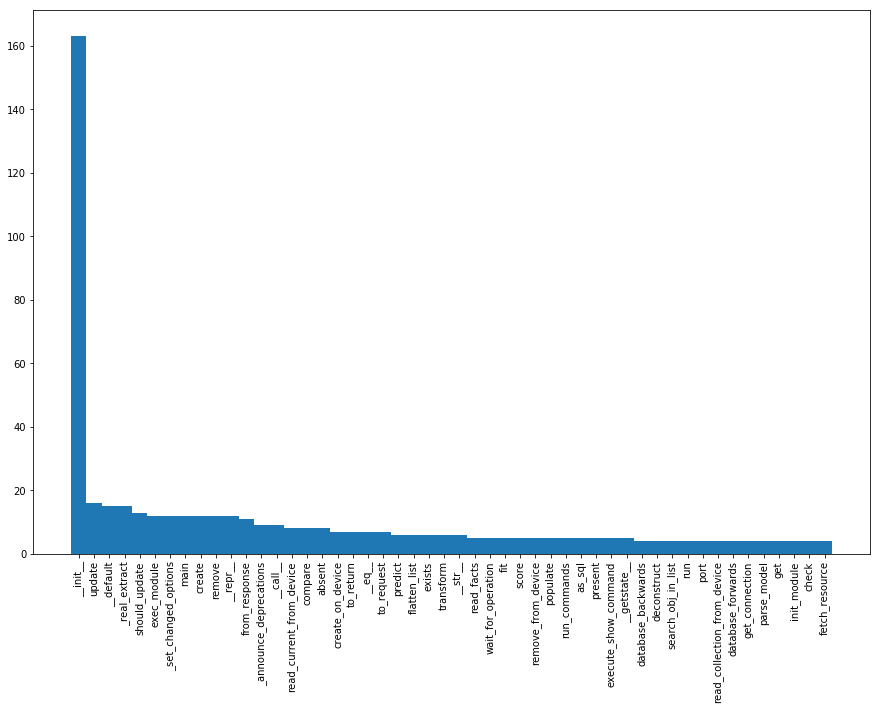

In [154]:
c = Counter(labels_str)

plt.figure(figsize=(15,10))
labels, values = zip(*c.most_common(50))

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=90)
plt.show()

In [155]:
l_dfs = [pd.read_csv(path+f+'_methodname_split_magret_label.txt', header=None) for f in fs]
labels_train = []; labels_train_str =[]
for l_df in l_dfs:
    for idx, row in l_df.iterrows():
        labels_train.append(vocab_label_df.index[vocab_label_df[0]==str(row[0])][0])
        labels_train_str.append(row[0])

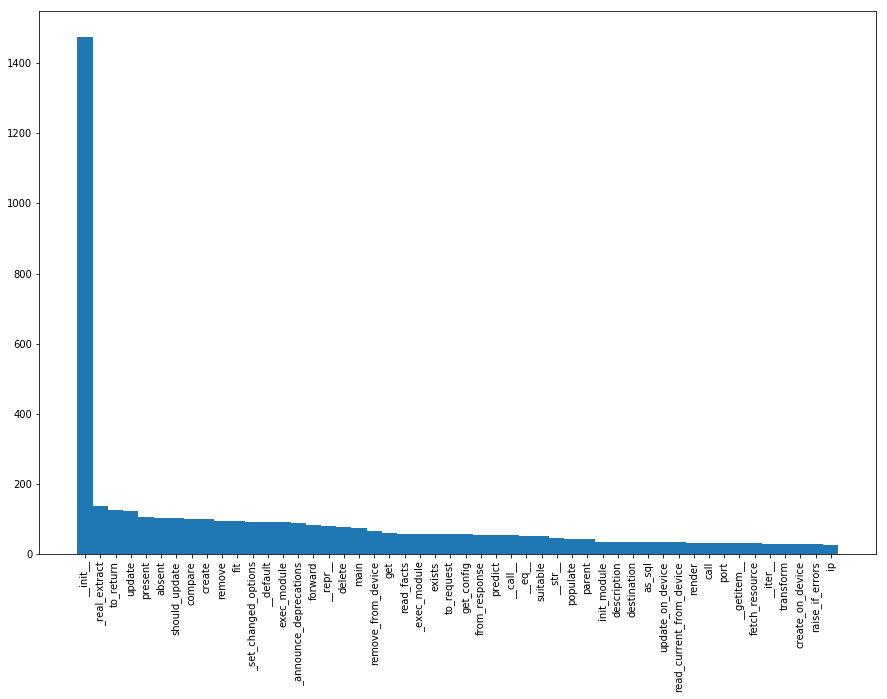

In [156]:
c = Counter(labels_train_str)

plt.figure(figsize=(15,10))
labels, values = zip(*c.most_common(50))

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=90)
plt.show()

In [157]:
inter = set(labels_train_str).intersection(set(labels_str))

In [158]:
vocab_label_df.loc[0][0]

'uniform_'

In [159]:
#snippet = pd.read_csv(path+'sparse_fname2_split_magret_tk_val.txt', header=None)
#snippet.loc[10][0]

In [160]:
pred_str = []; score = 0; rank = []; 
for idx, r in enumerate(preds):
    #print(snippet.loc[idx][0])
    print("Label =", labels_str[idx])
    preds_ = []
    print("Pred  =")
    correct = False
    
    for i in range(7):
        p = vocab_label_df.loc[r[i]][0]
        if p==labels_str[idx]:
            score +=1
            rank.append(i+1)
            print("---- {}. {} ({})".format(i,p,np.around(probs[idx][r[i]],3)))
            correct = True
        else:
            print("     {}. {} ({})".format(i,p,np.around(probs[idx][r[i]],3)))
        preds_.append(p)
    if correct == False:
        rank.append(i)
    pred_str.append(preds_)
    print()

Label = relu
Pred  =
---- 0. relu (0.773)
     1. selu (0.034)
     2. norm (0.011)
     3. greater_equal (0.009)
     4. greater (0.008)
     5. ones_like (0.005)
     6. softmax (0.005)

Label = get
Pred  =
---- 0. get (0.897)
     1. setdefault (0.018)
     2. __getitem__ (0.01)
     3. invoke (0.008)
     4. wrapper (0.004)
     5. head (0.002)
     6. register (0.002)

Label = __init__
Pred  =
---- 0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. start_serialization (0.0)
     3. __setstate__ (0.0)
     4. init_poolmanager (0.0)
     5. build (0.0)
     6. func (0.0)

Label = deserialize
Pred  =
---- 0. deserialize (0.997)
     1. from_config (0.0)
     2. _download_webpage_handle (0.0)
     3. add (0.0)
     4. extract (0.0)
     5. reset (0.0)
     6. call (0.0)

Label = get
Pred  =
---- 0. get (0.998)
     1. add (0.0)
     2. __getitem__ (0.0)
     3. post (0.0)
     4. delete (0.0)
     5. get_value (0.0)
     6. patch (0.0)

Label = __init__
Pred  =
---- 0. __init__ (0.42

     3. staged_decision_function (0.008)
     4. decision_path (0.007)
     5. predict (0.005)
     6. predict_proba (0.004)

Label = __deepcopy__
Pred  =
     0. _pairwise (0.978)
     1. _is_pairwise (0.003)
     2. _estimator_type (0.002)
     3. _final_estimator (0.001)
     4. named_estimators (0.001)
     5. _validate_X_predict (0.001)
     6. named_steps (0.0)

Label = half
Pred  =
     0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. unregister (0.0)
     3. start_serialization (0.0)
     4. destination (0.0)
     5. reset_batch_stats (0.0)
     6. func (0.0)

Label = __call__
Pred  =
     0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. predict_proba (0.0)
     3. __setstate__ (0.0)
     4. inverse_transform (0.0)
     5. start_serialization (0.0)
     6. destination (0.0)

Label = __setstate__
Pred  =
     0. set_weights (0.03)
     1. _rebuild (0.027)
     2. clear_location (0.013)
     3. __del__ (0.013)
     4. optimize (0.01)
     5. _weights_not_none (0.01)
     6.

     0. is_all_none (0.04)
     1. fromkeys (0.017)
     2. retrieval_context (0.012)
     3. _reset_dicts (0.01)
     4. test_category_dir_2 (0.009)
     5. x (0.009)
     6. children (0.008)

Label = predict
Pred  =
     0. _get_executor_init (0.018)
     1. is_file (0.017)
     2. is_logged (0.012)
     3. delete_address_from_mapping (0.009)
     4. has_shareable_memory (0.009)
     5. is_link_local (0.008)
     6. add_new_permissions (0.008)

Label = _score_to_proba
Pred  =
     0. _reconstruct_wrapper (0.177)
     1. _wrap_non_picklable_objects (0.073)
     2. non_trainable_weights (0.028)
     3. get_available_image_extensions (0.013)
     4. hash (0.01)
     5. trainable_weights (0.01)
     6. _reduce_partial (0.009)

Label = _score_to_proba
Pred  =
     0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. start_serialization (0.0)
     3. ip (0.0)
     4. func (0.0)
     5. __eq__ (0.0)
     6. init_poolmanager (0.0)

Label = test_warm_start_with_oob_score_fails
Pred  =
     0. 

Label = _errors_svd
Pred  =
     0. test_load_sample_images (0.332)
     1. test_default_load_files (0.071)
     2. test_load_diabetes (0.036)
     3. test_load_files_wo_load_content (0.028)
     4. test_load_wine (0.022)
     5. test_load_boston (0.013)
     6. test_load_iris (0.013)

Label = _get_learning_rate_type
Pred  =
     0. test_load_digits_n_class_lt_10 (0.952)
     1. test_lr_liblinear_warning (0.004)
     2. test_make_hastie_10_2 (0.001)
     3. test_load_wine (0.001)
     4. test_fetch (0.001)
     5. test_numerical_stability_large_gradient (0.001)
     6. test_singular_matrix (0.001)

Label = _check_proba
Pred  =
     0. test_deprecated_calinski_harabaz_score (0.025)
     1. test_fetch (0.025)
     2. test_attributes (0.023)
     3. kill_process (0.018)
     4. engine_version (0.018)
     5. test_gradient_squared_epsilon_insensitive (0.014)
     6. test_integer_input (0.01)

Label = predict
Pred  =
     0. image_dim_ordering (0.024)
     1. get_current_timezone (0.015)
  

     0. generate_formats (0.271)
     1. get_json_type (0.066)
     2. ie_key (0.023)
     3. test_sparse_coef (0.019)
     4. softplus (0.008)
     5. _generate_unsampled_indices (0.007)
     6. sigmoid (0.004)

Label = idf_
Pred  =
     0. _shuffle (0.033)
     1. _canonical_to_params (0.025)
     2. formula2 (0.015)
     3. handle_input8 (0.012)
     4. sparse_random (0.011)
     5. _clear_covers (0.009)
     6. _argmin_min_reduce (0.009)

Label = test_unicode_decode_error
Pred  =
     0. version_tuple (0.11)
     1. get_main_version (0.049)
     2. engine_supported (0.014)
     3. _find_path_in_tree (0.014)
     4. psycopg2_version (0.013)
     5. normalize_eols (0.012)
     6. slice_filter (0.01)

Label = test_countvectorizer_custom_vocabulary_repeated_indices
Pred  =
     0. _box_cox_optimize (0.448)
     1. safe_sparse_dot (0.035)
     2. strip_accents_ascii (0.021)
     3. _weight_func (0.02)
     4. test_power_transform_default_method (0.017)
     5. row_norms (0.015)
     6. 

     5. score (0.0)
     6. check_forward_input (0.0)

Label = __init__
Pred  =
     0. forward (1.0)
     1. __call__ (0.0)
     2. call (0.0)
     3. compute_output_shape (0.0)
     4. backward (0.0)
     5. check_forward_input (0.0)
     6. extra_repr (0.0)

Label = __repr__
Pred  =
     0. apply (0.052)
     1. mahalanobis (0.044)
     2. diag (0.04)
     3. cuda (0.027)
     4. double (0.026)
     5. _create_collection (0.022)
     6. predict (0.016)

Label = test_gpr_interpolation
Pred  =
     0. _register_load_state_dict_pre_hook (0.613)
     1. register_forward_hook (0.064)
     2. _register_state_dict_hook (0.038)
     3. register_backward_hook (0.006)
     4. score (0.003)
     5. half (0.002)
     6. get_client_id (0.002)

Label = __init__
Pred  =
     0. parameters (0.189)
     1. named_buffers (0.038)
     2. _load_plugin_commands (0.015)
     3. fromkeys (0.008)
     4. addSkip (0.007)
     5. set_exception (0.007)
     6. bulk_update (0.007)

Label = fit_transform
Pred  


Label = __init__
Pred  =
---- 0. __init__ (1.0)
     1. start_serialization (0.0)
     2. __setstate__ (0.0)
     3. __setitem__ (0.0)
     4. init_poolmanager (0.0)
     5. build (0.0)
     6. inverse_transform (0.0)

Label = __init__
Pred  =
---- 0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. start_serialization (0.0)
     3. func (0.0)
     4. __setstate__ (0.0)
     5. predict_proba (0.0)
     6. inverse_transform (0.0)

Label = le
Pred  =
     0. gt (0.48)
     1. lt (0.27)
     2. ge (0.061)
     3. contains (0.007)
     4. __getattr__ (0.007)
     5. __call__ (0.004)
     6. exists (0.003)

Label = __init__
Pred  =
---- 0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. start_serialization (0.0)
     3. init_poolmanager (0.0)
     4. __setstate__ (0.0)
     5. destination (0.0)
     6. func (0.0)

Label = __init__
Pred  =
---- 0. __init__ (1.0)
     1. start_serialization (0.0)
     2. __setitem__ (0.0)
     3. init_poolmanager (0.0)
     4. __setstate__ (0.0)
     5. des

Pred  =
     0. get_radius_client (0.072)
     1. get_hwtacacs_template (0.071)
     2. get_authentication_scheme (0.069)
     3. get_accounting_domain (0.069)
     4. get_hwtacacs_global_cfg (0.067)
     5. get_authentication_domain (0.067)
     6. get_authorization_scheme (0.066)

Label = cli_load_config
Pred  =
---- 0. cli_load_config (1.0)
     1. add (0.0)
     2. load_config (0.0)
     3. rollback (0.0)
     4. init_module (0.0)
     5. config_netstream_export (0.0)
     6. __init_module__ (0.0)

Label = check_response
Pred  =
---- 0. check_response (0.973)
     1. __check_response__ (0.02)
     2. netconf_set_config (0.001)
     3. cli (0.0)
     4. get_nc_config (0.0)
     5. netconf_get_config (0.0)
     6. check_vni_bd (0.0)

Label = cli_load_config
Pred  =
---- 0. cli_load_config (1.0)
     1. add (0.0)
     2. load_config (0.0)
     3. rollback (0.0)
     4. init_module (0.0)
     5. config_netstream_export (0.0)
     6. __init_module__ (0.0)

Label = rollback_last
Pred  =


---- 4. parse_image (0.069)
     5. parse_bandwidth (0.048)
     6. parse_lldp_intf (0.02)

Label = parse_lldp_intf
Pred  =
     0. parse_hostname (0.111)
     1. parse_description (0.094)
     2. parse_duplex (0.089)
     3. parse_operstatus (0.08)
     4. parse_lineprotocol (0.08)
     5. parse_type (0.071)
     6. parse_model (0.066)

Label = parse_lldp_host
Pred  =
     0. parse_hostname (0.111)
     1. parse_description (0.094)
     2. parse_duplex (0.089)
     3. parse_operstatus (0.08)
     4. parse_lineprotocol (0.08)
     5. parse_type (0.071)
     6. parse_model (0.066)

Label = to_lines
Pred  =
---- 0. to_lines (0.999)
     1. _to_lines (0.0)
     2. _request_for_item (0.0)
     3. add (0.0)
     4. _response_from_item (0.0)
     5. fail (0.0)
     6. get (0.0)

Label = populate
Pred  =
---- 0. populate (1.0)
     1. populate_memory (0.0)
     2. run_commands (0.0)
     3. populate_interfaces (0.0)
     4. parse_stacks (0.0)
     5. _check_known_errors (0.0)
     6. __init__

Label = __init__
Pred  =
---- 0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. start_serialization (0.0)
     3. init_poolmanager (0.0)
     4. destination (0.0)
     5. predict_proba (0.0)
     6. __setstate__ (0.0)

Label = _set_changed_options
Pred  =
---- 0. _set_changed_options (1.0)
     1. exec_module (0.0)
     2. create_on_device (0.0)
     3. get_running_config (0.0)
     4. __init__ (0.0)
     5. to_return (0.0)
     6. __setstate__ (0.0)

Label = update
Pred  =
---- 0. update (1.0)
     1. create (0.0)
     2. delete (0.0)
     3. put (0.0)
     4. patch (0.0)
     5. get (0.0)
     6. post (0.0)

Label = remove_from_device
Pred  =
---- 0. remove_from_device (1.0)
     1. exists (0.0)
     2. execute_on_device (0.0)
     3. deprecate (0.0)
     4. create_from_template_on_device (0.0)
     5. add (0.0)
     6. init_module (0.0)

Label = iquery_allow_service_check
Pred  =
     0. network_failover (0.078)
     1. iquery_allow_snmp (0.07)
     2. auto_sync (0.066)
     3. iq

     2. enabled (0.021)
     3. adaptive (0.021)
     4. reset_on_timeout (0.014)
     5. mgmt_dhcp (0.011)
     6. disabled (0.01)

Label = mac_masquerade_address
Pred  =
     0. description (0.47)
     1. server_name (0.039)
     2. ca_file (0.038)
     3. crl_file (0.036)
     4. shell (0.036)
     5. device_group (0.017)
     6. secondary_mirror_address (0.017)

Label = __init__
Pred  =
---- 0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. start_serialization (0.0)
     3. __setstate__ (0.0)
     4. destination (0.0)
     5. init_poolmanager (0.0)
     6. predict_proba (0.0)

Label = __init__
Pred  =
---- 0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. start_serialization (0.0)
     3. __setstate__ (0.0)
     4. destination (0.0)
     5. init_poolmanager (0.0)
     6. predict_proba (0.0)

Label = exec_module
Pred  =
---- 0. exec_module (1.0)
     1. add (0.0)
     2. get_reportable_changes (0.0)
     3. netconf_set_config (0.0)
     4. create_on_device (0.0)
     5. collecti

Label = __default
Pred  =
---- 0. __default (1.0)
     1. compare (0.0)
     2. remove_from_device (0.0)
     3. determine_change (0.0)
     4. add_command_to_interface (0.0)
     5. to_dense (0.0)
     6. _add (0.0)

Label = ip
Pred  =
---- 0. ip (0.995)
     1. local_ip (0.001)
     2. enabled (0.0)
     3. netmask (0.0)
     4. destination (0.0)
     5. address (0.0)
     6. port (0.0)

Label = probe_timeout
Pred  =
     0. timeout (0.188)
     1. time_until_up (0.077)
---- 2. probe_timeout (0.042)
     3. port (0.028)
     4. connection_limit (0.027)
     5. device_port (0.017)
     6. type (0.017)

Label = concurrency_limit
Pred  =
     0. timeout (0.188)
     1. time_until_up (0.077)
     2. probe_timeout (0.042)
     3. port (0.028)
     4. connection_limit (0.027)
     5. device_port (0.017)
     6. type (0.017)

Label = target_password
Pred  =
---- 0. target_password (0.998)
     1. snmp_auth_password (0.0)
     2. smtp_server_password (0.0)
     3. password_credential (0.0)
 

     3. get_context (0.0)
     4. netconf_load_config (0.0)
     5. has_changed (0.0)
     6. changed (0.0)

Label = __default
Pred  =
---- 0. __default (1.0)
     1. compare (0.0)
     2. remove_from_device (0.0)
     3. determine_change (0.0)
     4. add_command_to_interface (0.0)
     5. to_dense (0.0)
     6. _add (0.0)

Label = _file_is_missing
Pred  =
     0. exists (0.075)
     1. path_check (0.065)
     2. absent (0.043)
     3. check_file_absent_if_check_mode (0.025)
     4. checksum (0.021)
     5. traffic_group (0.017)
     6. on_bigip (0.016)

Label = exec_module
Pred  =
---- 0. exec_module (1.0)
     1. add (0.0)
     2. create_on_device (0.0)
     3. collection (0.0)
     4. get_reportable_changes (0.0)
     5. to_request (0.0)
     6. netconf_set_config (0.0)

Label = source
Pred  =
     0. encrypt_algorithm (0.219)
---- 1. source (0.151)
     2. mac_address (0.071)
     3. translation_address (0.065)
     4. description (0.051)
     5. unhandled_query_action (0.05)
    

---- 0. get_auto_lasthop (0.445)
     1. get_auto_failback_time (0.033)
     2. get_unit_id (0.03)
     3. get_auto_failback_enabled_state (0.018)
     4. get_edition (0.015)
     5. get_source_address_translation_snat_pool (0.012)
     6. get_active_lacp_state (0.008)

Label = get_bw_controller_policy
Pred  =
     0. get_actual_hardware_acceleration (0.097)
     1. get_bucket_request_payment (0.047)
     2. get_forward_proxy_lookup_by_ipaddr_port_state (0.021)
     3. get_enforced_firewall_policy (0.018)
     4. get_staged_firewall_policy (0.016)
     5. get_bucket_versioning (0.013)
     6. get_peer_certification_mode (0.012)

Label = get_fw_rule
Pred  =
---- 0. get_fw_rule (0.421)
     1. get_rate_class (0.023)
     2. get_related_rule (0.02)
     3. get_minimum_up_member_action (0.015)
     4. get_source_address_translation_snat_pool (0.013)
     5. get_aggregate_dynamic_ratio (0.013)
     6. get_minimum_up_member_enabled_state (0.011)

Label = get_persistence_profile
Pred  =
     

     2. start_serialization (0.0)
     3. __setstate__ (0.0)
     4. destination (0.0)
     5. init_poolmanager (0.0)
     6. build (0.0)

Label = geo_locations
Pred  =
     0. fqdns (0.75)
---- 1. geo_locations (0.1)
     2. icmp_message (0.024)
     3. addresses (0.013)
     4. metadata (0.01)
     5. tags (0.009)
     6. rules (0.008)

Label = addresses
Pred  =
---- 0. addresses (0.486)
     1. ports (0.41)
     2. port_ranges (0.019)
     3. icmp_message (0.005)
     4. port_lists (0.004)
     5. metadata (0.004)
     6. address_lists (0.003)

Label = addresses
Pred  =
---- 0. addresses (0.944)
     1. ports (0.005)
     2. address_lists (0.002)
     3. vlans (0.002)
     4. destinations (0.002)
     5. port_lists (0.002)
     6. dns_resolver (0.001)

Label = fqdns
Pred  =
---- 0. fqdns (0.914)
     1. geo_locations (0.013)
     2. route_domain (0.004)
     3. metadata (0.003)
     4. address_lists (0.003)
     5. icmp_message (0.003)
     6. pool (0.003)

Label = create_on_device



Label = fail_safe
Pred  =
     0. manual_resume (0.05)
     1. transparent (0.026)
     2. enabled (0.021)
     3. adaptive (0.021)
     4. reset_on_timeout (0.014)
     5. mgmt_dhcp (0.011)
     6. disabled (0.01)

Label = _announce_deprecations
Pred  =
---- 0. _announce_deprecations (1.0)
     1. _announce_warnings (0.0)
     2. deprecate (0.0)
     3. remove_from_device (0.0)
     4. get_result (0.0)
     5. disable (0.0)
     6. delete_resource (0.0)

Label = _announce_deprecations
Pred  =
---- 0. _announce_deprecations (1.0)
     1. _announce_warnings (0.0)
     2. deprecate (0.0)
     3. remove_from_device (0.0)
     4. get_result (0.0)
     5. disable (0.0)
     6. delete_resource (0.0)

Label = convert_cps_raw_data
Pred  =
     0. get_auth_plugin_mapping (0.009)
     1. get_option_default (0.009)
     2. openstack_module_kwargs (0.008)
     3. set_constant (0.008)
     4. find_param (0.007)
     5. _add_publicip_to_server (0.007)
     6. check_change_service_owner (0.007)

Lab

     2. _enable_ptp (0.058)
     3. _disable_ptp (0.053)
     4. _generate_igmp_interface_cmds (0.05)
---- 5. _generate_no_igmp_cmds (0.03)
     6. _generate_no_ospf_commands (0.023)

Label = _get_aggregate_spec
Pred  =
---- 0. _get_aggregate_spec (0.999)
     1. map_config_to_obj (0.0)
     2. to_dict (0.0)
     3. from_dict (0.0)
     4. _get_element_spec (0.0)
     5. append (0.0)
     6. pop (0.0)

Label = _get_lag_type
Pred  =
     0. _extract_lag_name (0.312)
     1. _split_optional_netmask (0.017)
     2. _get_interface_cmd_name (0.014)
     3. is_local_branch (0.011)
     4. docker_stack_services (0.01)
     5. needs_modification (0.008)
     6. is_switchport (0.006)

Label = prov_template_exists
Pred  =
     0. install_pp (0.214)
     1. fos_request (0.139)
     2. delete_script (0.087)
     3. assign_provision_template (0.063)
     4. assign_dev_grp (0.053)
     5. dev_group_exists (0.028)
     6. set_script (0.022)

Label = update_install_target
Pred  =
     0. install_pp (0

     0. find_datastore_cluster_by_name (0.114)
     1. find_datastore_by_name (0.049)
     2. mount_datastore_host (0.018)
     3. get_datastore_facts (0.011)
     4. find_host_portgroup_by_name (0.01)
     5. lookup_datastore_by_cluster (0.01)
     6. migrate_vm (0.009)

Label = gather_host_facts
Pred  =
     0. gather_host_portgroup_facts (0.372)
     1. get_Host (0.041)
     2. disconnect_all_containers (0.021)
     3. get_esx_host (0.019)
     4. vmdisk_id (0.016)
     5. get_datastore_facts (0.013)
     6. whitespace_tokenize (0.01)

Label = get_snapshots_by_name_recursively
Pred  =
---- 0. get_snapshots_by_name_recursively (0.989)
     1. get_current_snap_obj (0.001)
     2. _get_datacenter_id (0.0)
     3. add_object (0.0)
     4. list_snapshots_recursively (0.0)
     5. describe_target_health (0.0)
     6. _parse_meta (0.0)

Label = __exit__
Pred  =
---- 0. __exit__ (1.0)
     1. reraise (0.0)
     2. add_exception (0.0)
     3. raise_for_status (0.0)
     4. handle_exception (

     2. remove_all_targets (0.0)
     3. is_string (0.0)
     4. _compare (0.0)
     5. hash_type_xml_to_cli_str (0.0)
     6. is_empty_list (0.0)

Label = _delete_repository
Pred  =
     0. _create_repository (0.392)
     1. delete_resource (0.288)
     2. get_rule (0.029)
     3. create_resource (0.02)
     4. ensure_assign_ipv6_on_create (0.019)
     5. list_rules (0.008)
     6. list_web_acls (0.006)

Label = format_for_deletion
Pred  =
     0. format_for_insertion (0.984)
     1. _get_affinity_label_mappings (0.001)
     2. format_for_update (0.0)
     3. _read_gateway_fileshare_response (0.0)
     4. create_linux_profile_instance (0.0)
     5. get_optional (0.0)
     6. ensure_condition_absent (0.0)

Label = asg_exists
Pred  =
     0. get_snmp_groups (0.031)
     1. get_key_policy_with_backoff (0.016)
     2. converter (0.012)
     3. set_cookie (0.011)
     4. describe_target_health (0.01)
     5. build_volume_spec (0.01)
     6. set_signed_cookie (0.009)

Label = list_all_group

Label = selector
Pred  =
     0. filter_requested_info (0.038)
     1. format_attributes (0.03)
     2. _format_params (0.025)
     3. get_event (0.017)
     4. ordered_obj (0.013)
     5. tags_match (0.012)
     6. account_data (0.01)

Label = is_valid_uuid
Pred  =
---- 0. is_valid_uuid (0.994)
     1. parse_number (0.0)
     2. vm_state_transition (0.0)
     3. get_device_by_type (0.0)
     4. check_dp_exists (0.0)
     5. is_valid_hostname (0.0)
     6. build_entity (0.0)

Label = listify_string_name_or_id
Pred  =
     0. get_valid_filename (0.126)
     1. compat_shlex_quote (0.058)
     2. u (0.04)
     3. typecast_date (0.02)
     4. compat_shlex_split (0.018)
     5. is_drm_protected (0.017)
     6. encodeArgument (0.013)

Label = all_have_public_ip
Pred  =
     0. address_is_associated_with_device (0.075)
     1. has_public_ip (0.051)
     2. _normalize_port (0.041)
     3. present_static_nat (0.039)
     4. _find_address_by_device_id (0.03)
     5. present_ip_address (0.018)
  

---- 0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. destination (0.0)
     3. start_serialization (0.0)
     4. init_poolmanager (0.0)
     5. func (0.0)
     6. __setstate__ (0.0)

Label = _get_zone
Pred  =
---- 0. _get_zone (0.982)
     1. create_or_update_zone (0.0)
     2. delete_repository_policy (0.0)
     3. get_zones (0.0)
     4. recreate_instances_in_mig (0.0)
     5. find_in_app (0.0)
     6. find_instance (0.0)

Label = from_response
Pred  =
---- 0. from_response (0.996)
     1. to_request (0.002)
     2. _response_from_item (0.0)
     3. get (0.0)
     4. get_current (0.0)
     5. _request_for_item (0.0)
     6. warn (0.0)

Label = to_request
Pred  =
---- 0. to_request (0.502)
     1. from_response (0.492)
     2. get (0.001)
     3. _request_for_item (0.0)
     4. options (0.0)
     5. _response_from_item (0.0)
     6. messages (0.0)

Label = wait_for_operation
Pred  =
---- 0. wait_for_operation (1.0)
     1. get (0.0)
     2. ok (0.0)
     3. modify_db_instance (0.0

     1. get (0.003)
     2. encode (0.001)
     3. to_python (0.001)
     4. __call__ (0.001)
     5. __str__ (0.001)
     6. __len__ (0.001)

Label = __delitem__
Pred  =
---- 0. __delitem__ (0.673)
     1. __setitem__ (0.169)
     2. __getitem__ (0.034)
     3. _delete (0.008)
     4. setdefault (0.007)
     5. set (0.006)
     6. pop (0.004)

Label = get_dict
Pred  =
     0. get_key_func (0.067)
     1. change_dict_key_name (0.024)
     2. _set_none_to_blank (0.021)
     3. add_key_else_change_dict_key (0.019)
     4. id_for_label (0.016)
     5. try_get (0.013)
     6. get_prep_value (0.012)

Label = __delitem__
Pred  =
     0. append (0.6)
     1. create_cursor (0.021)
     2. fit_transform (0.017)
     3. insert (0.008)
     4. __delattr__ (0.007)
     5. reverse (0.006)
     6. save_form_data (0.005)

Label = merge_hooks
Pred  =
     0. remove_weight_norm (0.02)
     1. prepare_hooks (0.018)
     2. remove_spectral_norm (0.016)
     3. _get_server_id (0.009)
     4. get_child (0.

     0. __str__ (0.415)
     1. get_source_expressions (0.356)
     2. __len__ (0.043)
     3. to_python (0.021)
     4. get_indices (0.011)
     5. lists (0.01)
     6. __invert__ (0.006)

Label = __init__
Pred  =
---- 0. __init__ (1.0)
     1. _set_standard (0.0)
     2. reset_batch_stats (0.0)
     3. __eq__ (0.0)
     4. __setitem__ (0.0)
     5. start_serialization (0.0)
     6. set_source_expressions (0.0)

Label = __init__
Pred  =
---- 0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. start_serialization (0.0)
     3. init_poolmanager (0.0)
     4. __setstate__ (0.0)
     5. build (0.0)
     6. inverse_transform (0.0)

Label = add_update_fields
Pred  =
     0. hosts (0.037)
     1. to_list (0.025)
     2. subwidgets (0.024)
     3. flatten (0.02)
     4. __iter__ (0.019)
     5. overlaps (0.012)
     6. append (0.011)

Label = add_related_update
Pred  =
     0. add_field_update (0.064)
     1. check_field_type (0.026)
     2. make_generic_foreign_order_accessors (0.014)
     3

     5. references_field (0.0)
     6. remove_sql (0.0)

Label = state_forwards
Pred  =
---- 0. state_forwards (0.18)
     1. mutate_state (0.037)
     2. check_and_update_obj (0.03)
     3. __setstate__ (0.02)
     4. add_model (0.019)
     5. handle_app_config (0.011)
     6. register_endpoint (0.01)

Label = database_forwards
Pred  =
     0. database_backwards (0.959)
---- 1. database_forwards (0.019)
     2. ensure_schema (0.001)
     3. _get_child_type (0.0)
     4. remove_model (0.0)
     5. _is_empty_leaf (0.0)
     6. unset_installed_apps (0.0)

Label = database_backwards
Pred  =
---- 0. database_backwards (0.959)
     1. database_forwards (0.019)
     2. ensure_schema (0.001)
     3. _get_child_type (0.0)
     4. remove_model (0.0)
     5. _is_empty_leaf (0.0)
     6. unset_installed_apps (0.0)

Label = __repr__
Pred  =
     0. describe (0.627)
---- 1. __repr__ (0.173)
     2. __str__ (0.172)
     3. as_text (0.001)
     4. serialize (0.001)
     5. add (0.001)
     6. name (0

     0. __contains__ (0.218)
     1. has_perms (0.101)
     2. __str__ (0.059)
     3. count (0.039)
     4. has_perm (0.028)
     5. has_module_perms (0.027)
     6. is_cidr_notation (0.026)

Label = get_help_text
Pred  =
     0. as_ul (0.079)
     1. as_text (0.038)
     2. as_table (0.031)
     3. quote_name (0.024)
     4. inline_formset_data (0.023)
     5. RelatedObjectDoesNotExist (0.02)
     6. get_date_error_message (0.019)

Label = _post_clean
Pred  =
     0. validate (0.79)
     1. process_request (0.016)
     2. run_validators (0.015)
     3. confirm_login_allowed (0.01)
     4. _check_error (0.009)
     5. clean_password2 (0.008)
     6. _real_initialize (0.008)

Label = clean_old_password
Pred  =
     0. confirm_login_allowed (0.157)
     1. get_urls (0.067)
     2. validate (0.056)
     3. clean_new_password2 (0.039)
     4. create_user (0.033)
     5. get_username (0.027)
     6. get_invalid_login_error (0.026)

Label = get_hashers
Pred  =
     0. add_operation (0.029)


     1. __str__ (0.007)
     2. build (0.002)
     3. width (0.002)
     4. driver_count (0.002)
     5. partition (0.001)
     6. version (0.001)

Label = srid
Pred  =
---- 0. srid (0.14)
     1. srs (0.122)
     2. partition (0.1)
     3. content (0.016)
     4. permanent (0.01)
     5. array (0.009)
     6. validate (0.009)

Label = height
Pred  =
---- 0. height (0.913)
     1. width (0.016)
     2. dims (0.004)
     3. num_interior_rings (0.003)
     4. num_fields (0.002)
     5. geom_count (0.001)
     6. point_count (0.001)

Label = min
Pred  =
     0. max (0.332)
     1. mean (0.324)
     2. std (0.275)
---- 3. min (0.017)
     4. sum (0.004)
     5. var (0.002)
     6. prod (0.002)

Label = void_output
Pred  =
     0. int_output (0.135)
     1. voidptr_output (0.126)
     2. chararray_output (0.12)
     3. double_output (0.106)
     4. geom_output (0.062)
     5. srs_output (0.045)
     6. env_func (0.034)

Label = check_arg_errcode
Pred  =
     0. check_errcode (0.9)
     1. c

     0. bind_template (0.118)
     1. as_oracle (0.048)
     2. get_template (0.024)
     3. on_template_render (0.024)
     4. as_sqlite (0.024)
---- 5. get_template_sources (0.022)
     6. __iter__ (0.017)

Label = __init__
Pred  =
---- 0. __init__ (1.0)
     1. start_serialization (0.0)
     2. __setitem__ (0.0)
     3. init_poolmanager (0.0)
     4. load (0.0)
     5. destination (0.0)
     6. predict_proba (0.0)

Label = empty_form
Pred  =
     0. errors (0.221)
     1. as_table (0.055)
     2. total_error_count (0.044)
     3. auto_id (0.031)
     4. as_ul (0.026)
     5. non_form_errors (0.021)
     6. forms (0.019)

Label = add_prefix
Pred  =
     0. __str__ (0.532)
     1. describe (0.22)
---- 2. add_prefix (0.046)
     3. id_for_label (0.029)
     4. __getitem__ (0.012)
     5. __repr__ (0.008)
     6. add_initial_prefix (0.007)

Label = as_p
Pred  =
     0. as_table (0.855)
     1. as_ul (0.065)
---- 2. as_p (0.011)
     3. total_error_count (0.002)
     4. serialize_message

     4. _set_list (0.0)
     5. started (0.0)
     6. _body_from_file (0.0)

Label = receive_data_chunk
Pred  =
     0. file_complete (0.136)
     1. write_stream_with_colors_win_py3 (0.034)
     2. write (0.022)
     3. _is_empty_column_selection (0.017)
     4. render (0.017)
     5. read_manifest (0.016)
     6. area (0.015)

Label = attach_file
Pred  =
     0. update (0.032)
     1. _body_from_file (0.028)
     2. extract (0.02)
     3. is_valid_path (0.017)
     4. find (0.017)
     5. match_request (0.013)
     6. ensure_connection (0.009)

Label = _set_list_header_if_not_empty
Pred  =
     0. prepare_headers (0.173)
     1. setdefault (0.113)
     2. handle_youtubedl_headers (0.042)
     3. add_unredirected_header (0.042)
     4. compat_setenv (0.022)
     5. _is_object_changed (0.014)
     6. _check_type_jsonarg (0.012)

Label = send_messages
Pred  =
     0. to_screen (0.063)
     1. report_error (0.055)
     2. _real_initialize (0.034)
     3. unclosed_block_tag (0.012)
     4

     6. make_token (0.012)

Label = translation
Pred  =
     0. get_uid (0.106)
     1. cut (0.029)
     2. all (0.021)
     3. get_language_info (0.017)
     4. _sanitize_token (0.017)
     5. get_supported_language_variant (0.015)
     6. activate (0.015)

Label = _get_cache_fn
Pred  =
     0. __init__ (1.0)
     1. __setitem__ (0.0)
     2. __setstate__ (0.0)
     3. start_serialization (0.0)
     4. init_poolmanager (0.0)
     5. inverse_transform (0.0)
     6. build (0.0)

Label = _setup_socks4a
Pred  =
     0. __eq__ (0.999)
     1. __add__ (0.0)
     2. clear (0.0)
     3. add (0.0)
     4. __lt__ (0.0)
     5. difference (0.0)
     6. clone (0.0)

Label = connect_ex
Pred  =
     0. __iter__ (0.166)
     1. __init__ (0.139)
     2. to_dict (0.057)
     3. __init_module__ (0.031)
     4. init_module (0.03)
     5. ip (0.016)
     6. values (0.015)

Label = next_value
Pred  =
     0. log_error (0.178)
     1. log (0.045)
     2. _warning (0.033)
     3. api_validation (0.029)
    

     1. _extract_medias (0.026)
     2. get_node (0.02)
     3. _strip_spaces (0.018)
     4. get_from_attributes (0.017)
     5. _findall (0.013)
     6. xml_text (0.01)

Label = _get_cms_resource
Pred  =
     0. sign (0.537)
     1. md5 (0.17)
     2. base64_hmac (0.064)
     3. sha256sum (0.007)
     4. gather (0.004)
     5. softsign (0.004)
     6. function (0.003)

Label = _real_extract
Pred  =
     0. md5_utf8 (0.047)
     1. hash_key (0.041)
     2. sha_utf8 (0.03)
     3. names_digest (0.029)
     4. _hash (0.028)
     5. get_session_auth_hash (0.028)
     6. build_unique_id (0.022)

Label = suitable
Pred  =
     0. _call_api (0.025)
     1. process_request (0.02)
     2. _get_consumer_secret (0.018)
     3. _real_initialize (0.018)
     4. get_raw_uri (0.014)
     5. get_path_info (0.012)
     6. extract (0.009)

Label = _real_extract
Pred  =
     0. _create_path_to_field (0.04)
     1. subtitles_filename (0.02)
     2. encode_host (0.016)
     3. hash_type_xml_to_cli_str (0.

In [161]:
score/len(preds)

0.43825538623226484

In [162]:
1/np.mean(rank)

0.2515199577055247

In [163]:
# Restricted set

In [164]:
per_token_acc = {}; per_token_count = {}
for idx, r in enumerate(preds):
    prediction = vocab_label_df.loc[r[0]][0]
    label = labels_str[idx]
    if per_token_acc.get(label, None) == None:
            per_token_acc[label] = 0
            per_token_count[label] = 0
    per_token_acc[label] += int(prediction == label)
    per_token_count[label] += 1

In [165]:
total_per_token_accuracy = {}
per_token_freq = {}
for k,v in per_token_acc.items():
    if per_token_count[k] > 0:
        total_per_token_accuracy[k] = v / per_token_count[k]
        per_token_freq[k] = per_token_count[k] / len(preds)

In [166]:
c = Counter(total_per_token_accuracy)
c.most_common(1000)

[('sql_client', 1.0),
 ('handle', 1.0),
 ('has_lldp', 1.0),
 ('dispatch', 1.0),
 ('do_fail', 1.0),
 ('present_firewall_rule', 1.0),
 ('node_addresses', 1.0),
 ('ip', 1.0),
 ('_combine', 1.0),
 ('device_is_id', 1.0),
 ('l2_normalize', 1.0),
 ('manual_resume', 1.0),
 ('std', 1.0),
 ('to_return', 1.0),
 ('media', 1.0),
 ('update_sub', 1.0),
 ('validate_ip_v6_address', 1.0),
 ('to_lines', 1.0),
 ('contains', 1.0),
 ('describe_subnets_with_backoff', 1.0),
 ('self_link', 1.0),
 ('get_losses_for', 1.0),
 ('call', 1.0),
 ('centroid', 1.0),
 ('_remove_prefetched_objects', 1.0),
 ('parse_interfaces', 1.0),
 ('frame_distribution_hash', 1.0),
 ('_resolve_output_field', 1.0),
 ('address', 1.0),
 ('kml', 1.0),
 ('interval', 1.0),
 ('converter', 1.0),
 ('_announce_deprecations', 1.0),
 ('eye', 1.0),
 ('field_choices', 1.0),
 ('get_required_config', 1.0),
 ('hardware_information', 1.0),
 ('monitors_list', 1.0),
 ('contribute_to_class', 1.0),
 ('run_commands', 1.0),
 ('_get_connection', 1.0),
 ('get_ca

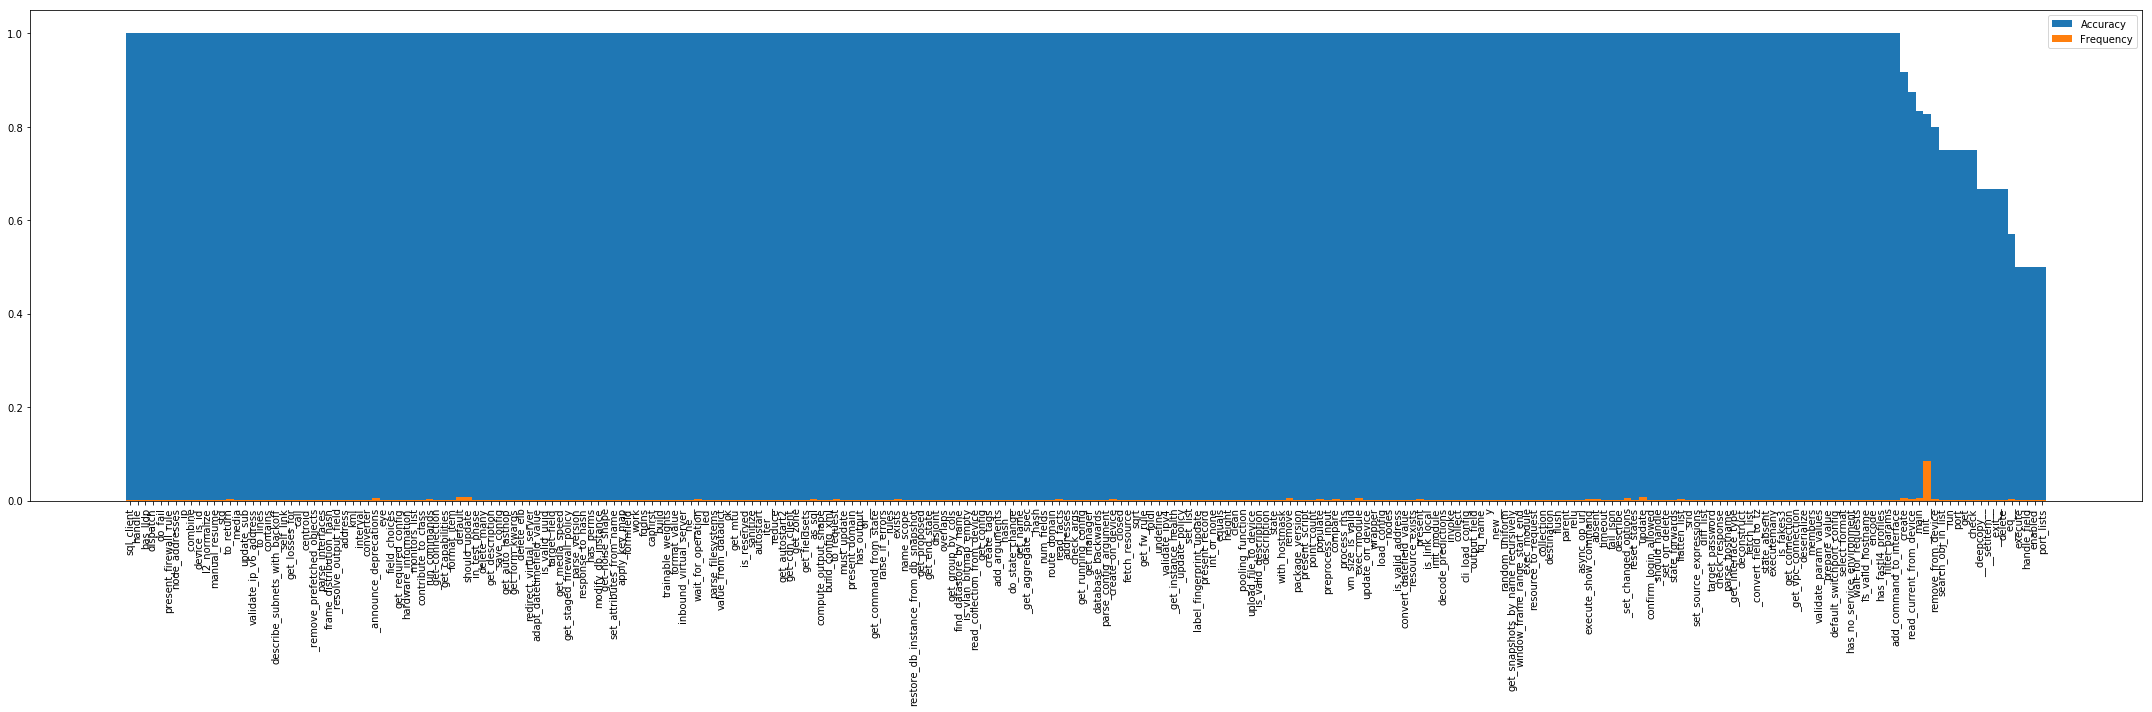

In [167]:
plt.figure(figsize=(30,10))
labels, values = zip(*c.most_common(250))

indexes = np.arange(len(labels))
width = 1

freqs = [per_token_freq[l] for l in labels]

mean_freq = np.mean(list(per_token_freq.values()))
#mean_acc = (accuracy / len(preds))

plt.bar(indexes, values, width, label='Accuracy')
plt.bar(indexes, freqs, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
#plt.title('BERT (100k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
#plt.savefig('BERT-100k2_epochs_top100.pdf')
plt.show()

In [168]:
d = Counter(per_token_freq)
d.most_common(100)

[('__init__', 0.08565423016290068),
 ('update', 0.008407777193904361),
 ('_real_extract', 0.007882291119285338),
 ('__default', 0.007882291119285338),
 ('should_update', 0.006831318970047294),
 ('remove', 0.006305832895428271),
 ('exec_module', 0.006305832895428271),
 ('_set_changed_options', 0.006305832895428271),
 ('main', 0.006305832895428271),
 ('create', 0.006305832895428271),
 ('__repr__', 0.006305832895428271),
 ('from_response', 0.005780346820809248),
 ('_announce_deprecations', 0.004729374671571204),
 ('__call__', 0.004729374671571204),
 ('read_current_from_device', 0.004203888596952181),
 ('compare', 0.004203888596952181),
 ('absent', 0.004203888596952181),
 ('to_return', 0.0036784025223331584),
 ('to_request', 0.0036784025223331584),
 ('create_on_device', 0.0036784025223331584),
 ('__eq__', 0.0036784025223331584),
 ('exists', 0.0031529164477141357),
 ('predict', 0.0031529164477141357),
 ('flatten_list', 0.0031529164477141357),
 ('transform', 0.0031529164477141357),
 ('__str_

In [169]:
len(d)

1278

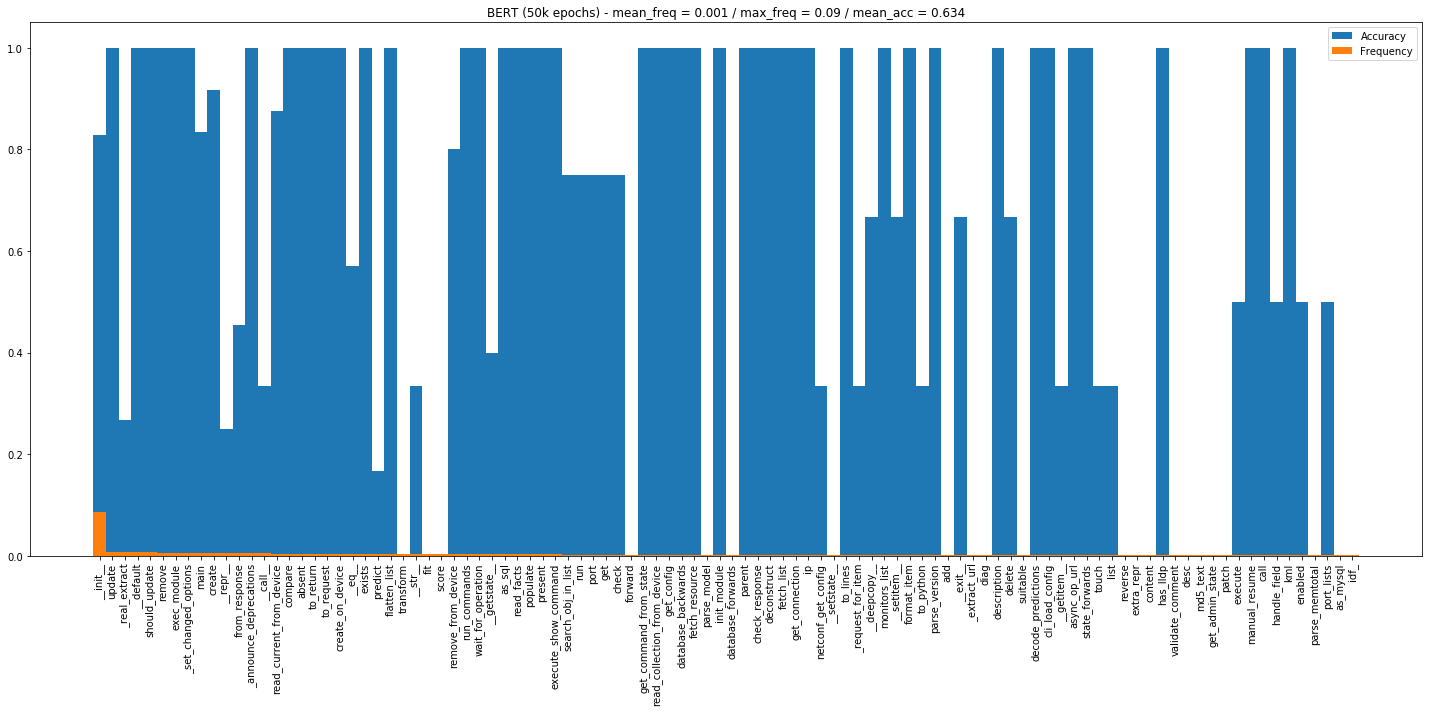

In [179]:
plt.figure(figsize=(20,10))
labels, values = zip(*d.most_common(100))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]
mean_acc = np.mean(accuracies)

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('BERT (50k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
#plt.savefig('BERT-freq-50k_epochs_top100.png')
plt.show()

In [171]:
label_count = Counter(labels_str)
train_label_count = Counter(labels_train_str)

In [172]:
total = sum(label_count.values(), 0.0)
for key in label_count:
    label_count[key] /= total

In [173]:
total = sum(train_label_count.values(), 0.0)
for key in train_label_count:
    train_label_count[key] /= total

In [174]:
inter_labels = [l for l in labels_str if l in inter]
inter_label_count = Counter(inter_labels)
total = sum(inter_label_count.values(), 0.0)
for key in inter_label_count:
    inter_label_count[key] /= total

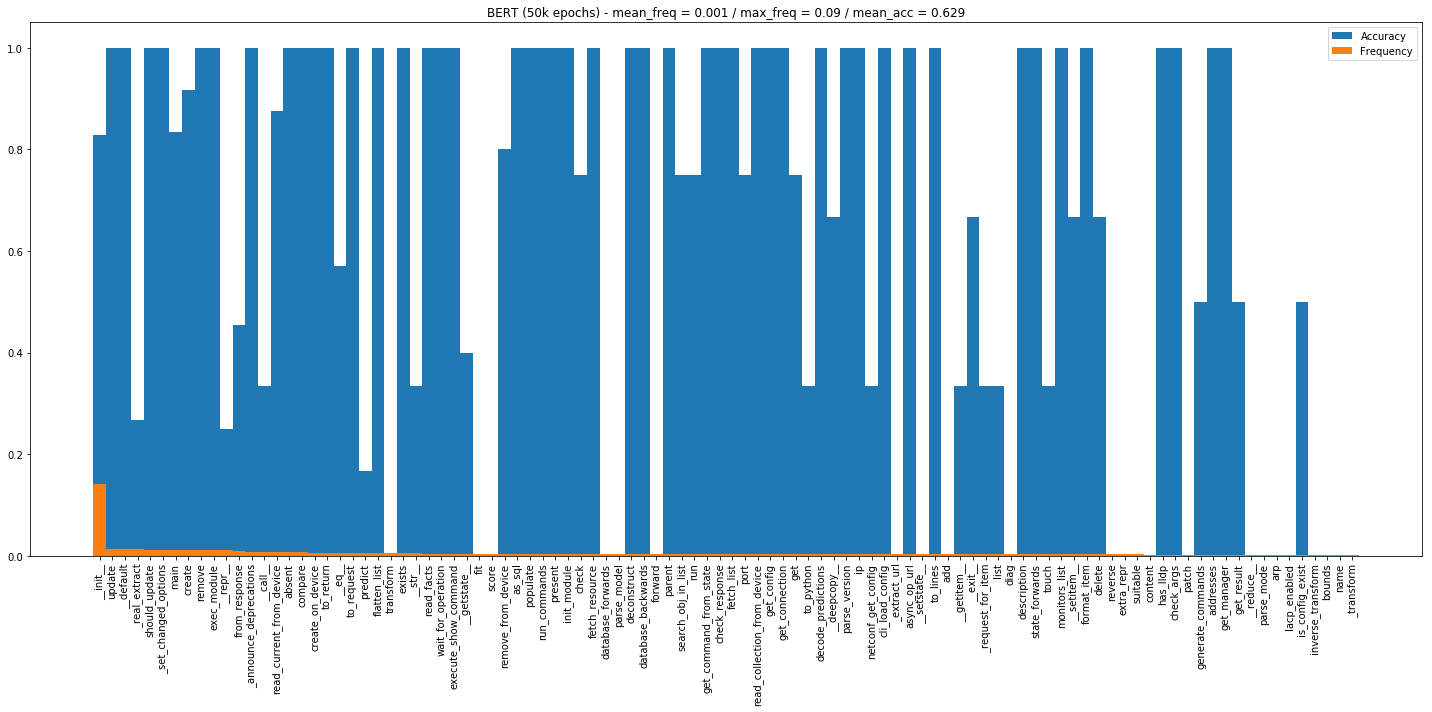

In [178]:
plt.figure(figsize=(20,10))
labels, values = zip(*inter_label_count.most_common(100))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]
mean_acc = np.mean(accuracies)

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('BERT (50k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
#plt.savefig('BERT-freq-50k_epochs_top100.png')
plt.show()

In [185]:
inter_acc = np.sum([total_per_token_accuracy[key] * inter_label_count[key]  for key in inter_label_count])
inter_acc

0.6074847693646649

In [176]:
novel_labels = [l for l in labels_str if (l in labels_str) and (l not in labels_train_str)]
novel_label_count = Counter(novel_labels)
total = sum(novel_label_count.values(), 0.0)
for key in novel_label_count:
    novel_label_count[key] /= total

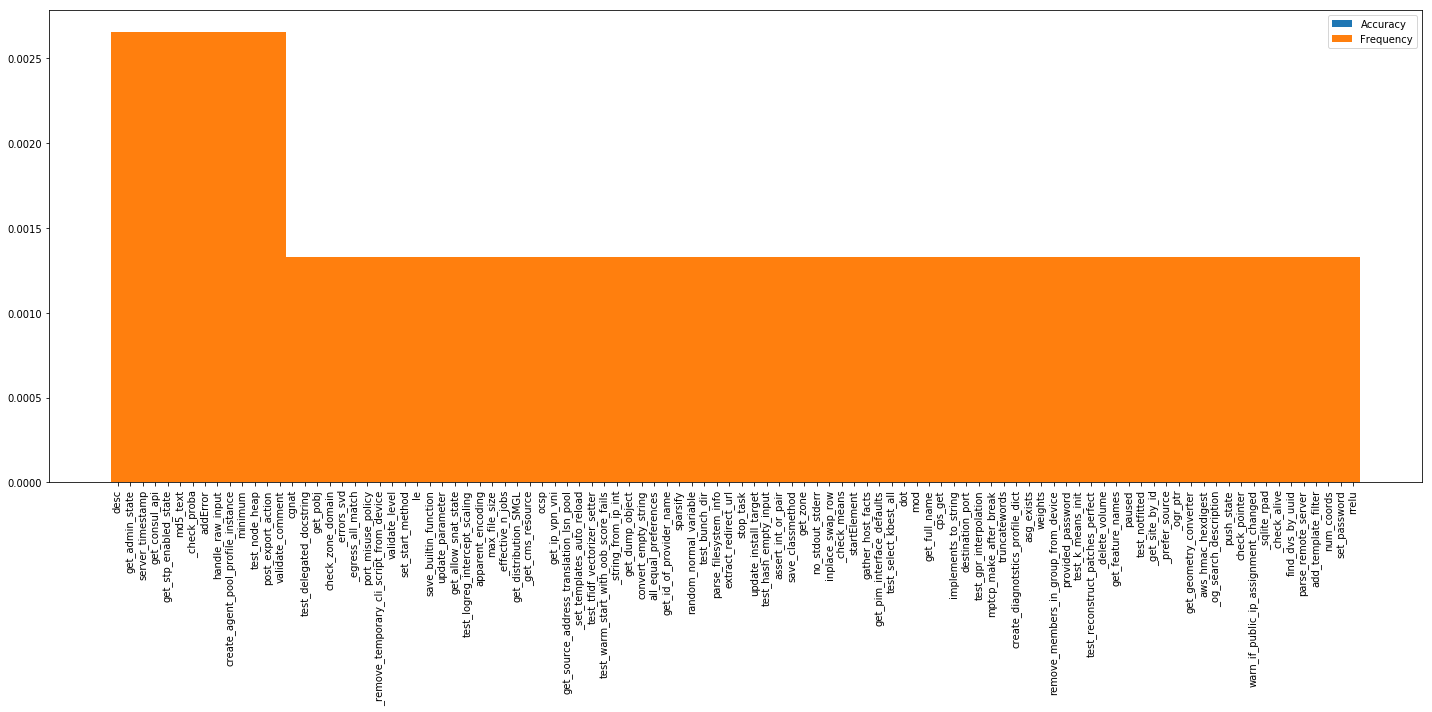

In [177]:
plt.figure(figsize=(20,10))
labels, values = zip(*novel_label_count.most_common(100))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
#plt.title('BERT (50k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
#plt.savefig('BERT-freq-50k_epochs_top100.png')
plt.show()

## from scipy import io

In [84]:
m = io.mmread('../sparse/adj/1_sparse_fname2_split_magret_adj.mtx').toarray()

In [85]:
import matplotlib.pyplot as plt

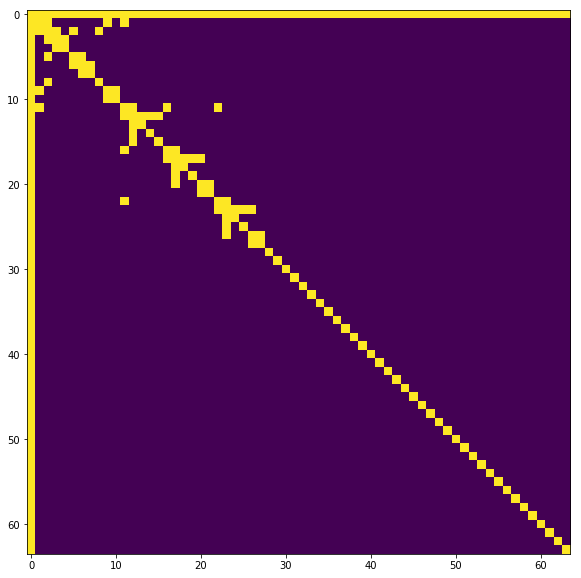

In [86]:
plt.figure(figsize=(10,10))
plt.imshow(m)

In [87]:
np.count_nonzero(m[56,:])

2

In [88]:
eye = np.eye(64)

In [89]:
shuffle_idx = np.random.permutation(20)

In [90]:
G = nx.from_numpy_matrix(m)
#shuffled_adj = nx.adjacency_matrix(G, nodelist=shuffle_idx).todense()

In [96]:
emb_len = len(snippet.loc[1][0].split(' '))
emb_len

20

In [97]:
G = nx.from_numpy_matrix(m[:emb_len,:emb_len])

In [98]:
edges = list(G.edges(0))
G.remove_edges_from(edges)

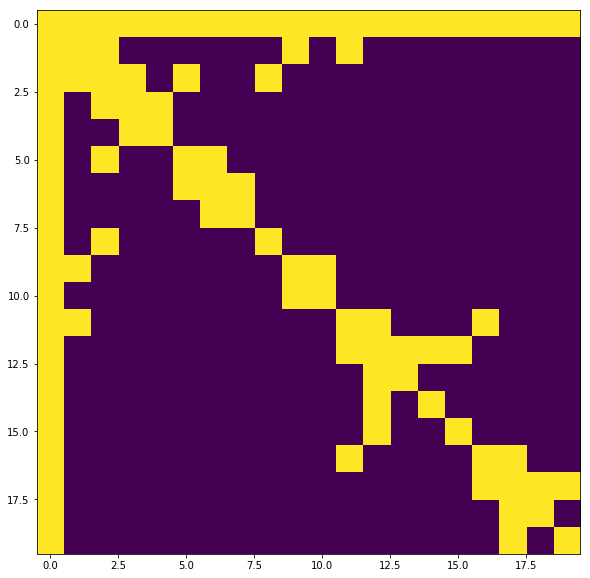

In [99]:
plt.figure(figsize=(10,10))
plt.imshow(m[:emb_len,:emb_len])

In [101]:
snippet.loc[1][0].split(' ')

['[CLS]',
 'FunctionDef',
 'arguments',
 'arg',
 'self',
 'arg',
 'model',
 'For',
 'Name',
 'callback',
 'Attribute',
 'callbacks',
 'Name',
 'Expr',
 'Call',
 'Attribute',
 'set',
 'model',
 'Name',
 'Name']

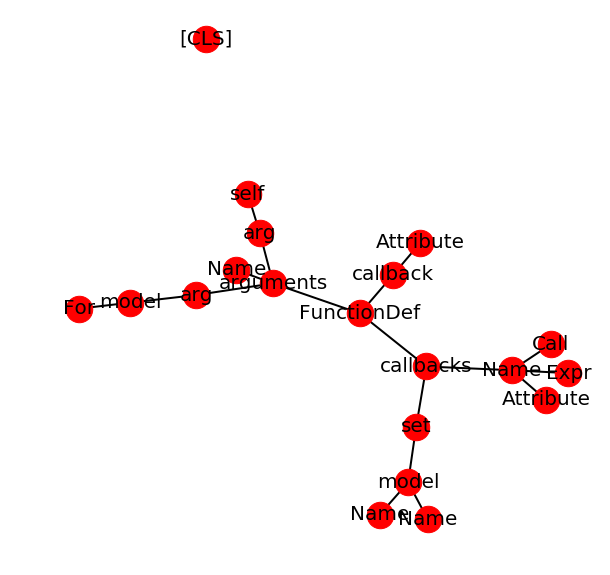

In [103]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, width=2)
# labels
nx.draw_networkx_labels(G, pos, labels=dict(zip(range(emb_len),snippet.loc[1][0].split(' '))), font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

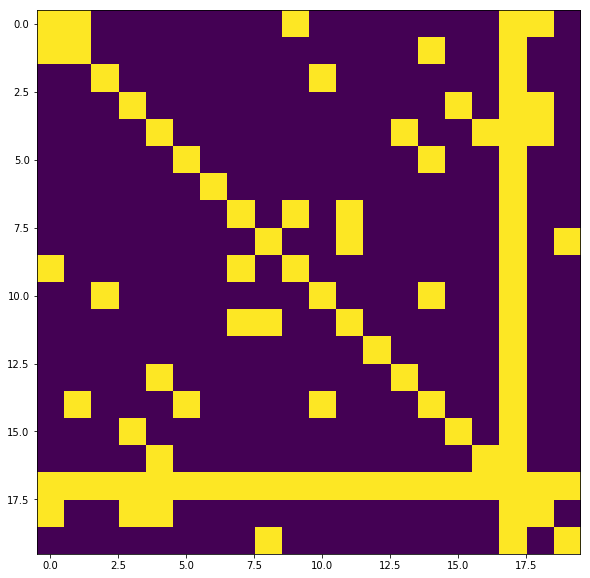

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(shuffled_adj)
#plt.xticks(range(20), idx);

In [33]:
eye[:len(shuffled_adj), :len(shuffled_adj)] = shuffled_adj

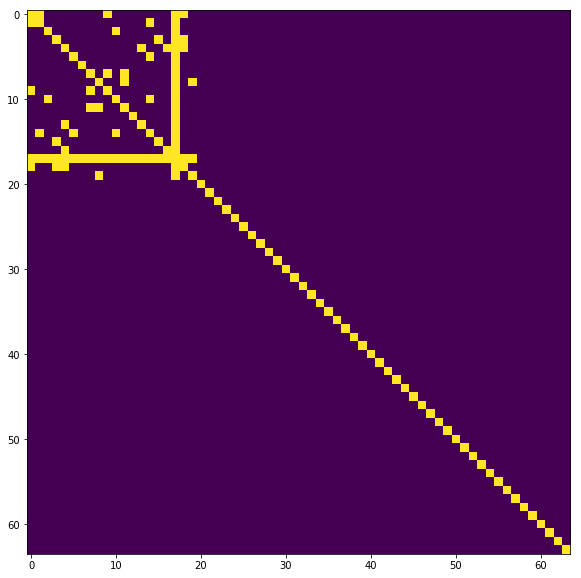

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(eye)

In [55]:
enc_df = pd.read_csv(path+'cls_output-embed/encoder_results.tsv', header=None, sep='\t')
enc_df.shape

(4800, 768)

In [104]:
embeddings = enc_df.values.reshape((75,64,768))

In [74]:
snippet.loc[5][0], len(snippet.loc[5][0].split(' '))

('[CLS] FunctionDef arguments arg self arg minval arg maxval arg seed UnaryOp USub Num Num NameConstant Assign Attribute minval Name Name Assign Attribute maxval Name Name Assign Attribute seed Name Name',
 31)

In [76]:
snippet.loc[11][0], len(snippet.loc[11][0].split(' '))

('[CLS] FunctionDef arguments arg self arg sequence arg use multiprocessing arg shuffle NameConstant NameConstant Expr Call Attribute init Call Name Name Name Name Name Assign Attribute shuffle Name Name',
 29)

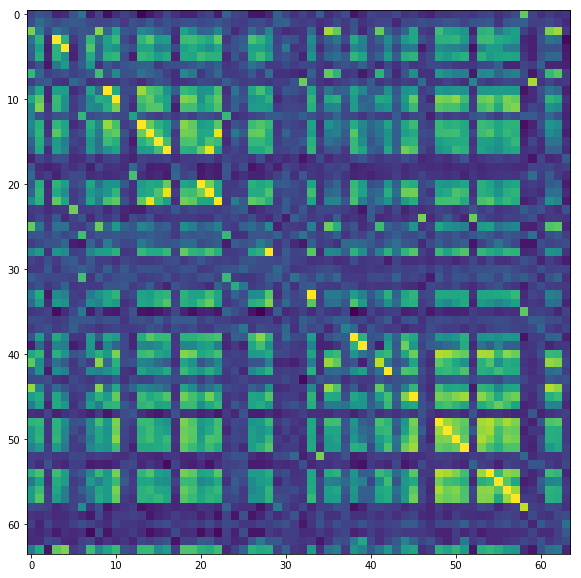

In [69]:
sim = np.dot(embeddings[:,5], embeddings[:,11].T)
plt.figure(figsize=(10,10))
plt.imshow(sim)

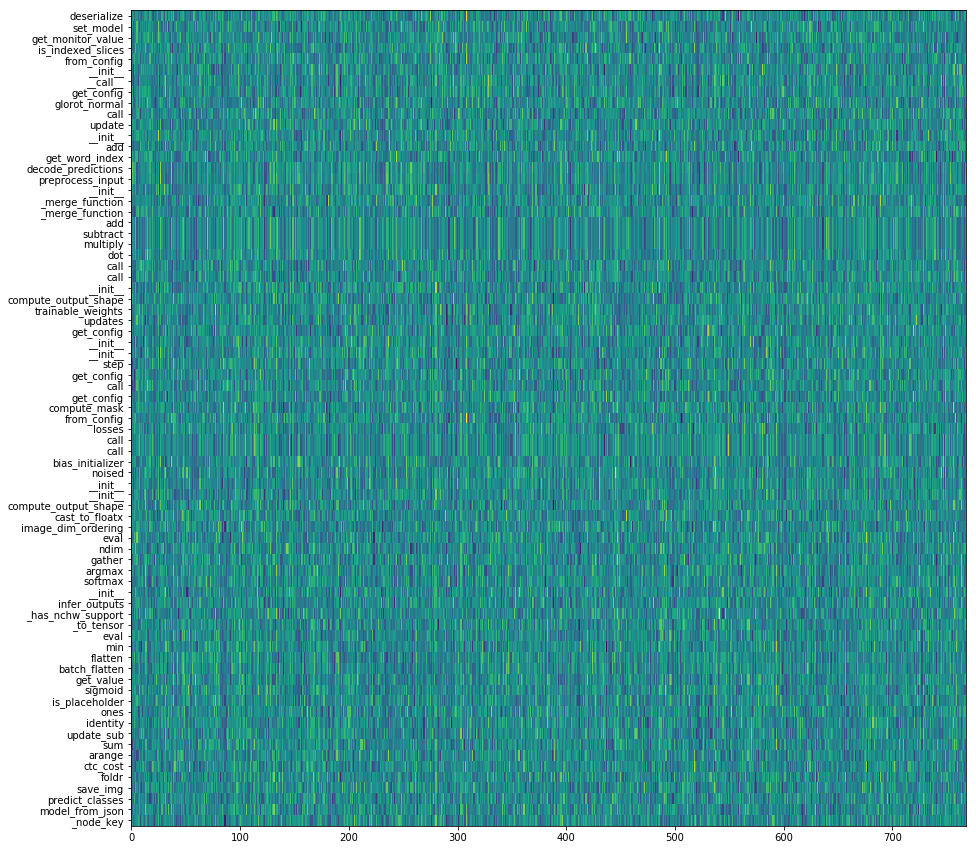

In [105]:
plt.figure(figsize=(20,15))
plt.imshow(embeddings[:,0], aspect=10)
plt.yticks(range(75), labels_str);

In [106]:
embeddings.shape

(75, 64, 768)

In [107]:
from sklearn.metrics.pairwise import cosine_similarity

In [110]:
cos = cosine_similarity(embeddings[:,0])
cos.shape

(75, 75)

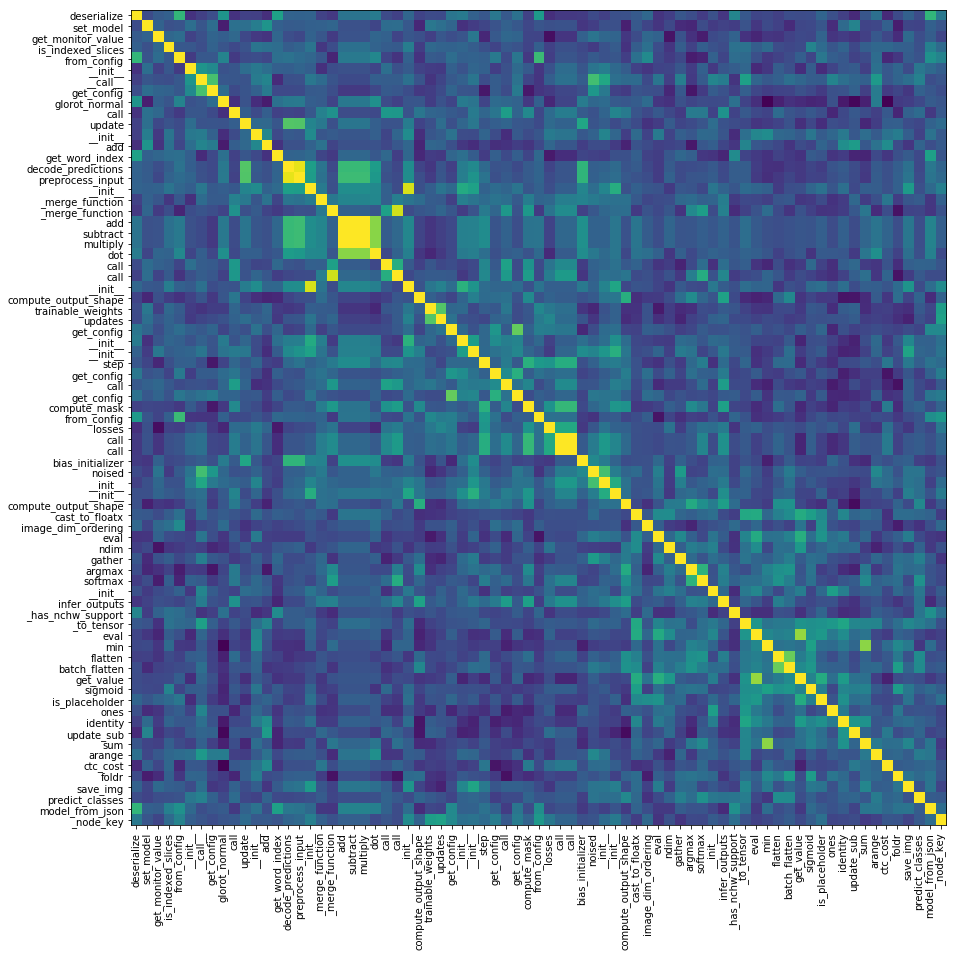

In [114]:
plt.figure(figsize=(20,15))
plt.imshow(cos)
plt.yticks(range(75), labels_str);
plt.xticks(range(75), labels_str, rotation=90);

In [148]:
score_sim = 0
for i in range(75):
    print(label_df.loc[i][0])
    rnk = 7
    ranked = np.argsort(cos[i])[::-1][:rnk+1]
    r = preds[i]
    match = False
    
    for j in range(rnk):
        if (label_df.loc[ranked[0]][0]==label_df.loc[ranked[j+1]][0]) & (match == False):
            score_sim +=1
            match==True
        sim_pred = label_df.loc[ranked[j+1]][0]
        pred_pred = vocab_label_df.loc[r[j]][0]
        print("--- s: {}  p: {}".format(sim_pred, pred_pred))
    print()

deserialize
--- s: from_config  p: deserialize
--- s: model_from_json  p: from_config
--- s: get_word_index  p: get_config
--- s: from_config  p: in_test_phase
--- s: glorot_normal  p: model_from_config
--- s: _has_nchw_support  p: _postprocess_conv3d_output
--- s: dot  p: _prepare_name

set_model
--- s: add  p: __init__
--- s: update_sub  p: set_params
--- s: __init__  p: on_epoch_end
--- s: trainable_weights  p: on_train_end
--- s: call  p: on_train_begin
--- s: update  p: predict
--- s: updates  p: __enter__

get_monitor_value
--- s: __init__  p: on_train_begin
--- s: noised  p: on_epoch_end
--- s: from_config  p: __init__
--- s: save_img  p: on_train_end
--- s: image_dim_ordering  p: get_config
--- s: call  p: on_batch_end
--- s: __init__  p: validate_file

is_indexed_slices
--- s: sigmoid  p: deserialize
--- s: model_from_json  p: from_config
--- s: __init__  p: stop_gradient
--- s: __init__  p: _prepare_name
--- s: __init__  p: get_config
--- s: _to_tensor  p: is_sparse
--- s: _h


predict_classes
--- s: softmax  p: argmax
--- s: flatten  p: predict_proba
--- s: batch_flatten  p: compute_output_shape
--- s: compute_output_shape  p: argmin
--- s: __call__  p: losses
--- s: gather  p: cell
--- s: _to_tensor  p: one_hot

model_from_json
--- s: deserialize  p: get
--- s: get_word_index  p: deserialize
--- s: from_config  p: on_epoch_end
--- s: _has_nchw_support  p: model_from_yaml
--- s: from_config  p: model_from_config
--- s: get_config  p: from_config
--- s: add  p: forward

_node_key
--- s: updates  p: _make_node_key
--- s: trainable_weights  p: from_config
--- s: from_config  p: is_keras_tensor
--- s: __init__  p: raise_duplicate_arg_error
--- s: get_config  p: get_output_shape_at
--- s: from_config  p: get_uid
--- s: __init__  p: count_params



In [149]:
score_sim/75

0.8533333333333334